Este proyecto consiste en realizar un análisis exploratorio a una base de datos que cuenta la librería Seaborn sobre pinguinos y sus distintas características

Importamos librerias a ocupar en el proyecto

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ssl

Cargamos los datos

In [25]:
ssl._create_default_https_context = ssl._create_unverified_context
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


1. Realizamos la primera estapa que es conocer y validar nuestros datos

Identificamos el tipo de dato que posee cada variable

In [4]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Contamos cuantas variables hay por cada tipo de dato

In [5]:
df.dtypes.value_counts()

float64    4
object     3
dtype: int64

Vemos cuantas filas y columnas tiene el Dataframe

In [6]:
df.shape

(344, 7)

Vemos si existen columnas con valores nulos 

In [7]:
df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

Vemos cuantos valores nulos hay por columnas

In [8]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Sumamos el total de valores nulos 

In [9]:
df.isnull().sum().sum()

19

Graficamos la proporcion de valores nulos por cada variable

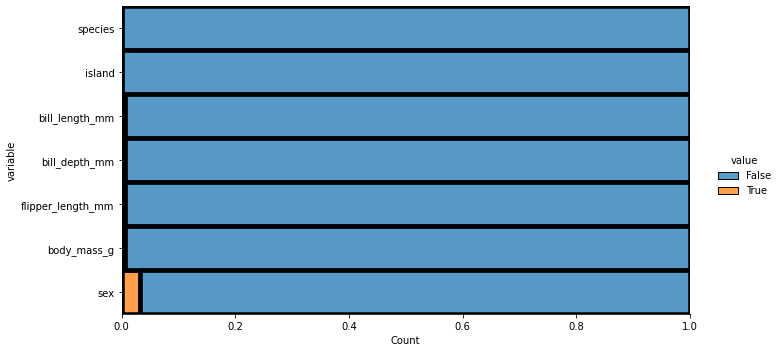

In [10]:
df.isnull().melt().pipe(
    lambda df:(
        sns.displot(
            data=df,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2
        )
    )
)

Ahora lo vemos por cada pinguino, para ver si quizás es un solo pinguino el que tiene mayores valores nulos

<AxesSubplot:>

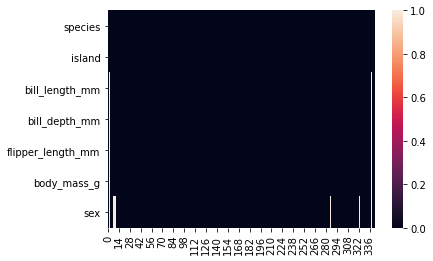

In [11]:
df.isnull().transpose().pipe(
    lambda df:(
        sns.heatmap(
            data=df
        )
    )
)

Como son pocos los valores nulos en este caso lo mejor es eliminar esos valores

In [12]:
df_limpio = df.dropna()
df_limpio.isnull().sum()


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

2. Exploramos nuestras variables categóricas

Acá verenos los estadiscos de todo el conjunto de datos

In [13]:
df_limpio.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


Si queremos ver solo los estadisticos de las variables numéricas

In [16]:
df_limpio.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


Si queremos ver los estadísticos solo de las variables categóricas

In [17]:
df_limpio.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


Ahora podemos graficar el conteo de las especies mediante dos maneras

<AxesSubplot:>

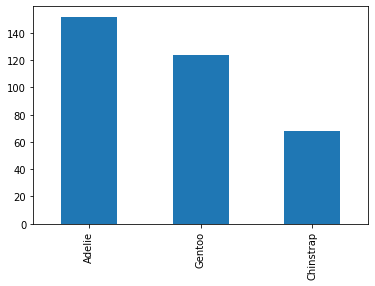

In [18]:
df.species.value_counts().plot(kind='bar')

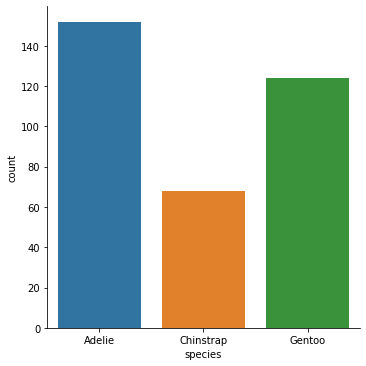

In [19]:
sns.catplot(data=df,x='species',kind='count')

Si queremos ver la proporción de forma gráfica

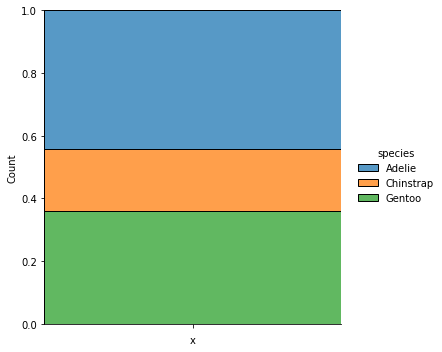

In [27]:
df['x'] = ''  
sns.displot(data=df, x='x', hue='species', multiple='fill')
plt.show()

3. Medidas de Tendencia Central

La media

In [28]:
df.bill_depth_mm.mean()

17.151169590643278

In [29]:
df.mean()

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

La mediana

In [30]:
df.median()

bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

La moda

In [31]:
df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,x
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,Male,


In [32]:
df.describe(include=object)

,species,island,sex,x
count,344,344,333,344
unique,3,3,2,1
top,Adelie,Biscoe,Male,
freq,152,168,168,344


4. Medidas de disperción y distribuciones

El máximo valor de las variables numericas

In [36]:
maximo = df.max(numeric_only=True)
print(maximo)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64


El minimo valor de las varianbles numericas

In [37]:
minimo = df.min(numeric_only=True)
print(minimo)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: float64


El rango

In [40]:
rango = maximo-minimo
print(rango)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
dtype: float64


La desviación estandar

In [42]:
desv = df.std()
print(desv)

bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
dtype: float64


El rango intercuartilico

In [43]:
q75 = df.quantile(0.75)
q25 = df.quantile(0.25)
rango_int = q75-q25
print(rango_int)

bill_length_mm          9.275
bill_depth_mm           3.100
flipper_length_mm      23.000
body_mass_g          1200.000
dtype: float64


In [44]:
df.quantile(q=[0.75,0.50,0.25]).transpose()

,0.75,0.50,0.25
bill_length_mm,48.5,44.45,39.225
bill_depth_mm,18.7,17.30,15.600
flipper_length_mm,213.0,197.00,190.000
body_mass_g,4750.0,4050.00,3550.000


Distribución de las variables

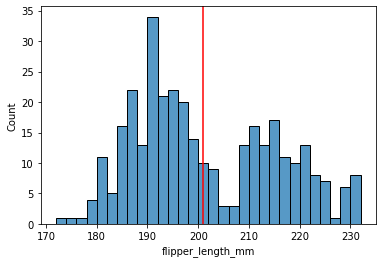

In [49]:
sns.histplot(data=df_limpio,
             x='flipper_length_mm',
             binwidth=2)

plt.axvline(x=df.flipper_length_mm.mean(),color='red')

Diagrama de caja / boxplot

<AxesSubplot:xlabel='flipper_length_mm'>

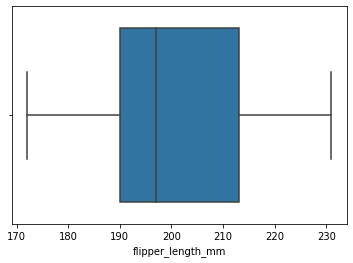

In [50]:
sns.boxplot(data=df,
            x='flipper_length_mm')